In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_excel("C:/Users/kiman/OneDrive/Desktop/coffee shops/Coffee Shop Sales.xlsx")

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [9]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [10]:
df['sales'] = df['transaction_qty'] = df['unit_price']

In [11]:
df['datetime'] = df['transaction_date'] + df['transaction_time']

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,3.0,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,3.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,3.1,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,3.1,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,4.5,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.5,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,2.0,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,3.1,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,3.1,2023-01-01 07:22:41


In [12]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,3.382219,5.342063,47.918607,3.382219,3.382219,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,0.800000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,2.500000,3.000000,33.000000,2.500000,2.500000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,3.000000,5.000000,47.000000,3.000000,3.000000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,3.750000,8.000000,60.000000,3.750000,3.750000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,45.000000,8.000000,87.000000,45.000000,45.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,2.658723,2.074241,17.930020,2.658723,2.658723,NaN


In [13]:
df_location = df.groupby('store_location').agg({
    'sales': 'sum',
    'transaction_id': 'count'
})

df_location

,sales,transaction_id
store_location,,
Astoria,171272.41,50599
Hell's Kitchen,172205.67,50735
Lower Manhattan,160864.95,47782


In [14]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['sales'].sum().unstack()

daily_sales_by_location 

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,600.65,584.65,546.50
2023-01-02,661.90,599.05,483.00
2023-01-03,644.80,656.45,525.35
2023-01-04,579.10,525.40,428.90
2023-01-05,630.60,518.20,566.55
...,...,...,...
2023-06-26,1351.90,1330.50,1298.05
2023-06-27,1320.95,1179.05,1510.05
2023-06-28,1206.15,1057.60,1072.00


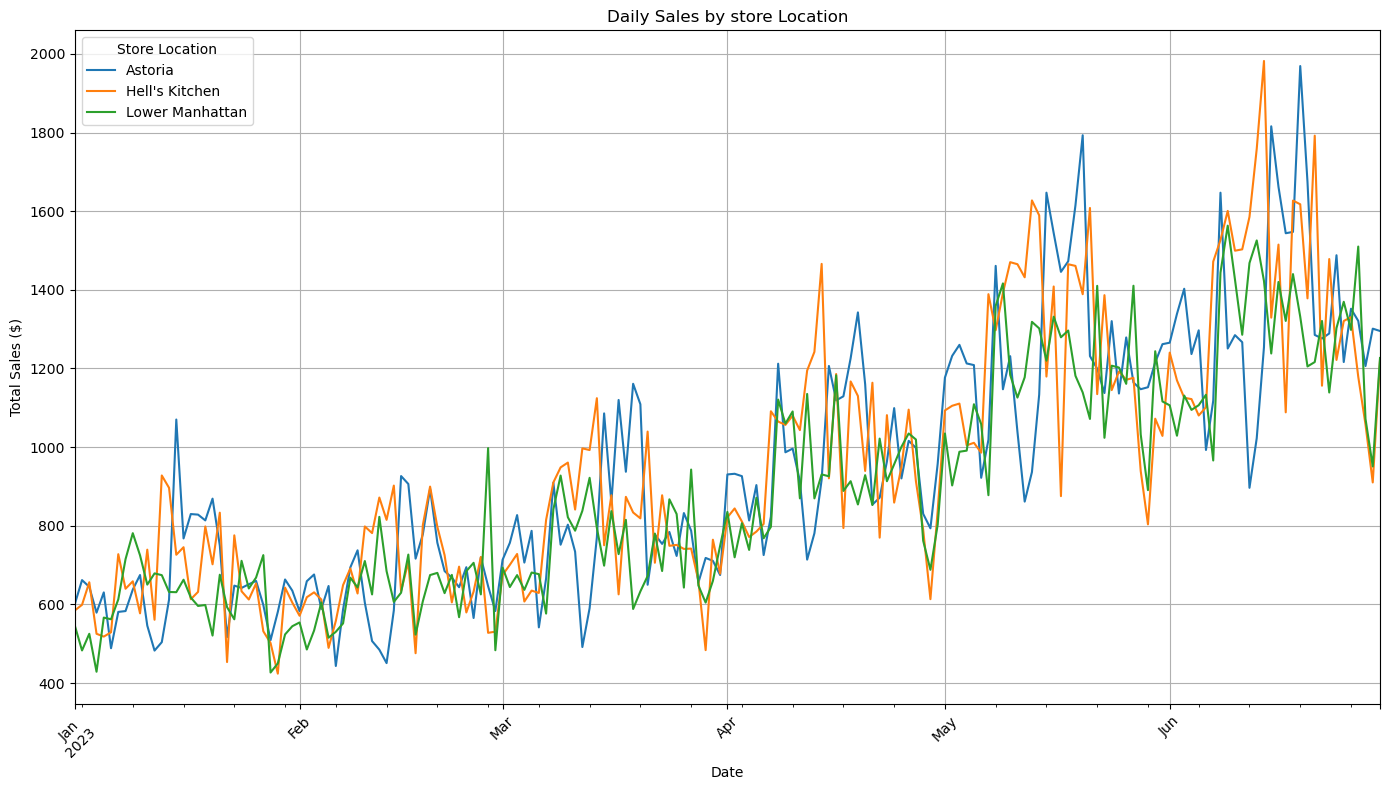

In [15]:
daily_sales_by_location.plot(figsize=(14,8), title='Daily Sales by store Location')

plt.xlabel('Date')
plt.ylabel("Total Sales ($)")
plt.legend(title='Store Location')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

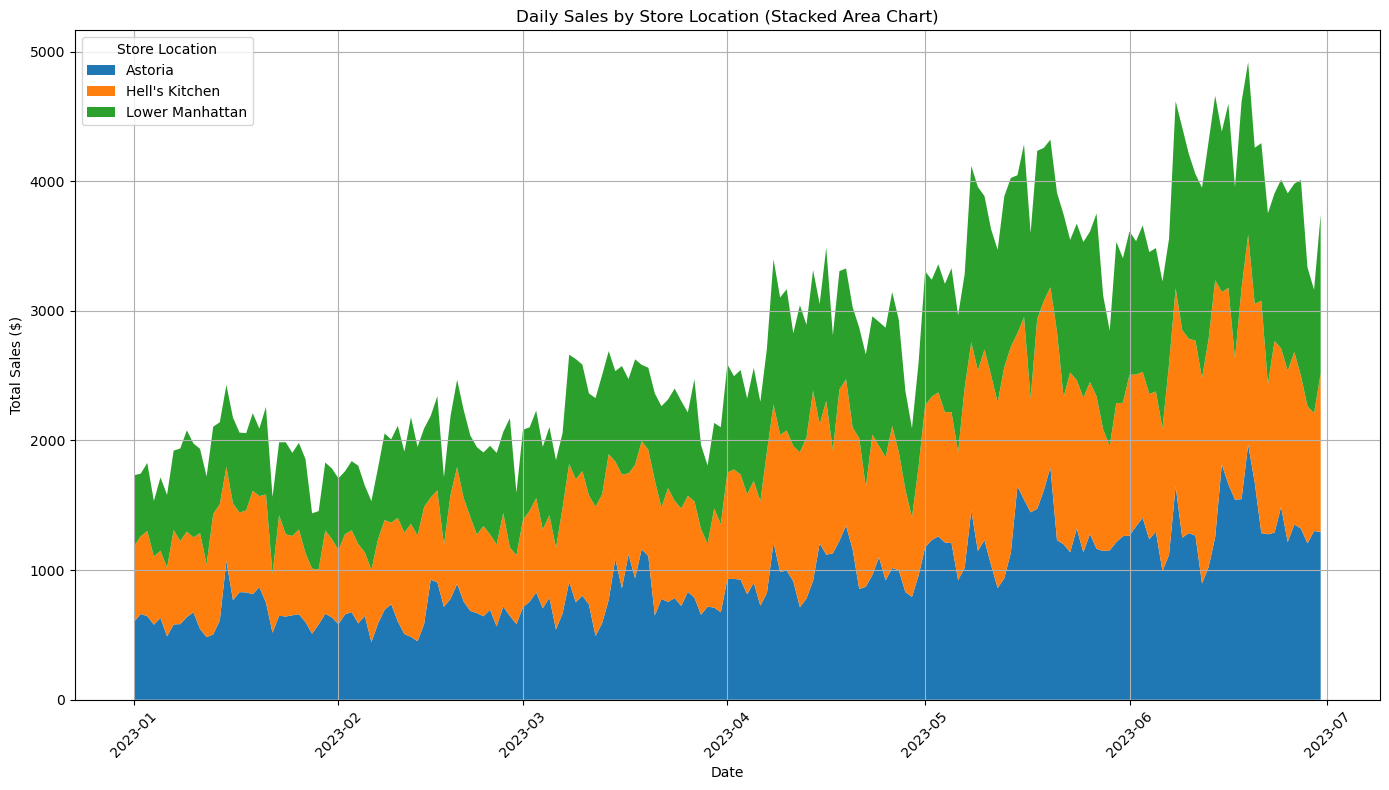

In [16]:
plt.figure(figsize=(14,8))

plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns)

plt.title('Daily Sales by Store Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel("Total Sales ($)")
plt.legend(title='Store Location', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#Show the plot
plt.show


In [17]:
daily_sales= df.groupby('transaction_date')['sales'].sum().reset_index()

df['day_of_week']= df['datetime'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

df['month']= df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()


daily_sales, weekly_sales, monthly_sales

(    transaction_date    sales
 0         2023-01-01  1731.80
 1         2023-01-02  1743.95
 2         2023-01-03  1826.60
 3         2023-01-04  1533.40
 4         2023-01-05  1715.35
 ..               ...      ...
 176       2023-06-26  3980.45
 177       2023-06-27  4010.05
 178       2023-06-28  3335.75
 179       2023-06-29  3162.35
 180       2023-06-30  3742.17
 
 [181 rows x 2 columns],
   day_of_week     sales
 0      Monday  72919.58
 1     Tuesday  71916.49
 2   wednesday       NaN
 3    Thursday  72689.43
 4      Friday  73198.80
 5    Saturday  69368.43
 6      Sunday  71725.21,
      month      sales
 0  2023-01   59018.04
 1  2023-02   55134.34
 2  2023-03   71833.08
 3  2023-04   85709.58
 4  2023-05  113076.91
 5  2023-06  119571.08)

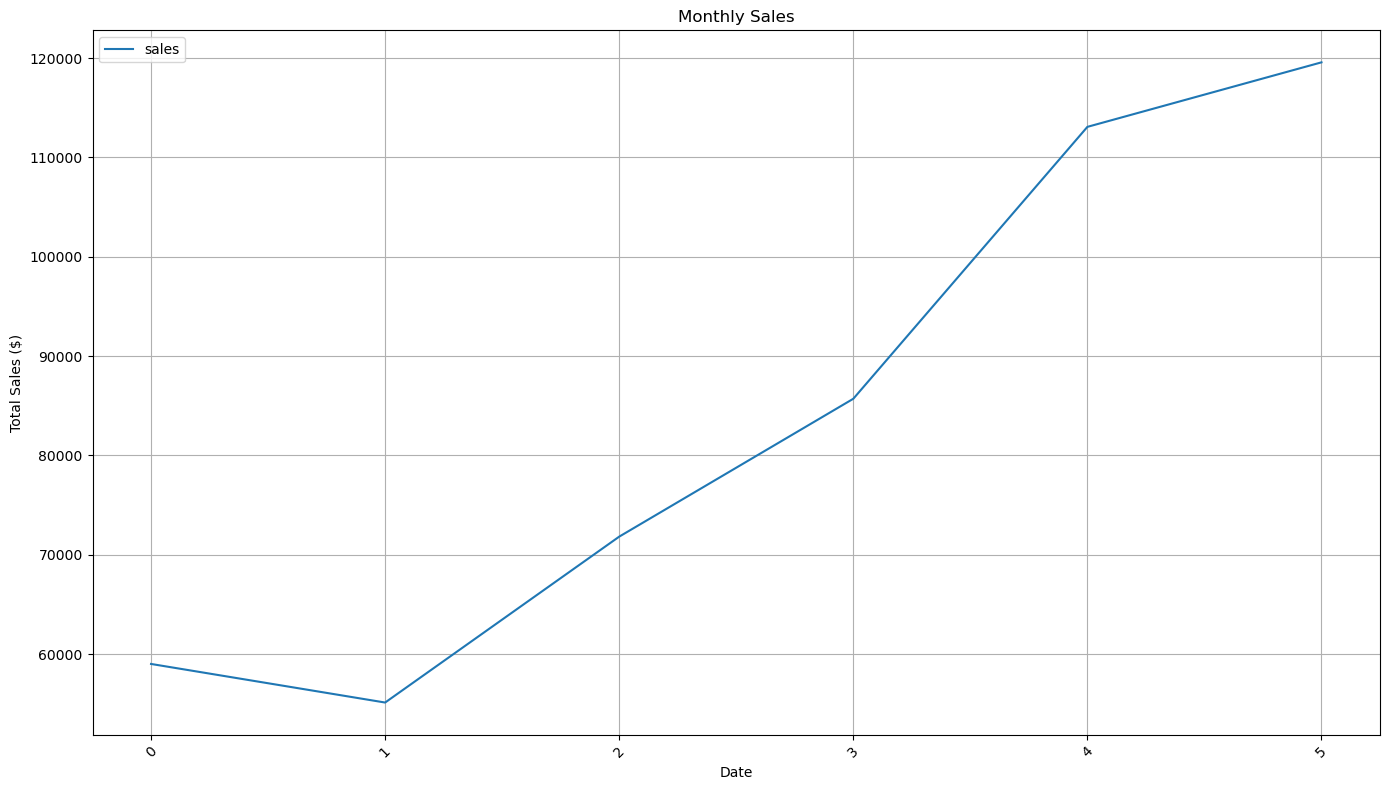

In [18]:
monthly_sales.plot(figsize=(14,8), title='Monthly Sales')

plt.xlabel('Date')
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [19]:
weekly_sales= df.groupby(['day_of_week', 'store_location'])['sales'].sum().unstack()

days_order= ['Monday', 'Tuesday', 'wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)

weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,25007.49,23969.71,23942.38
Tuesday,23770.86,25245.42,22900.21
wednesday,NaN,NaN,NaN
Thursday,25197.82,24540.56,22951.05
Friday,24586.45,25487.38,23124.97
Saturday,23542.33,23165.63,22660.47
Sunday,24126.83,25121.73,22476.65


AttributeError: 'Text' object has no property 'frontweight'

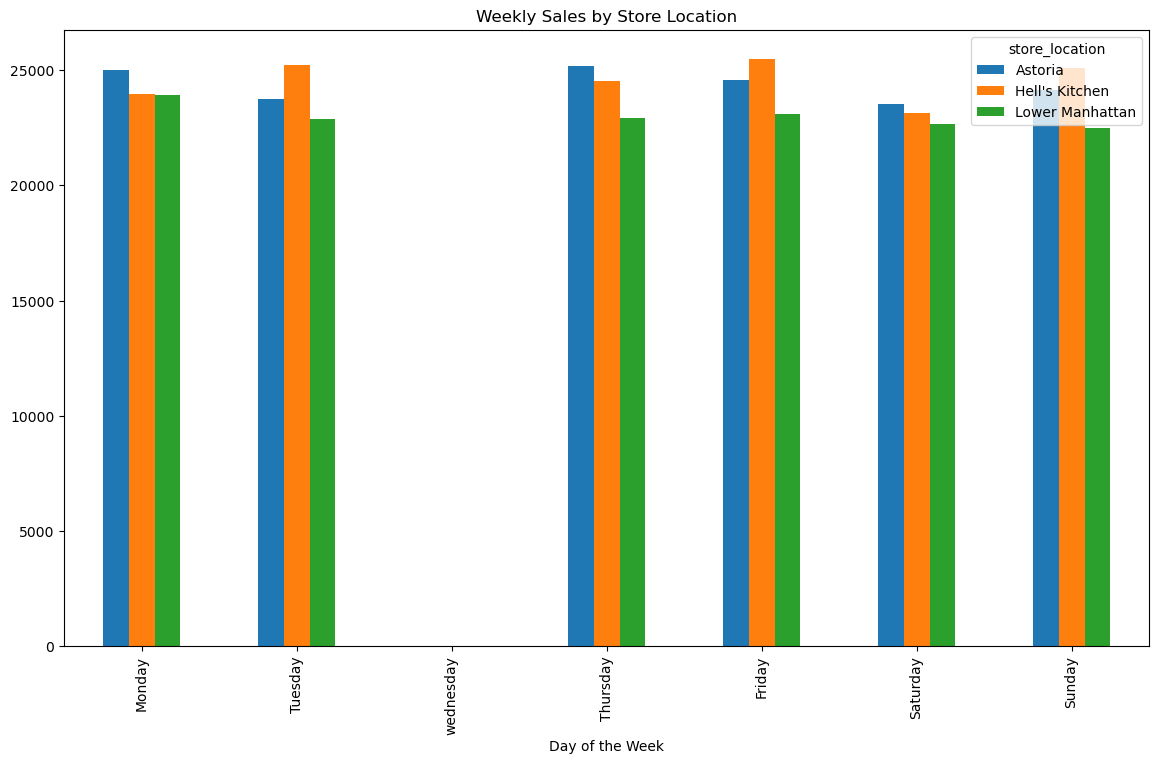

In [20]:
weekly_sales[["Astoria", "Hell's Kitchen", "Lower Manhattan"]].plot(kind= 'bar', figsize=(14,8))

plt.title('Weekly Sales by Store Location')
plt.xlabel('Day of the Week', frontweight='bold')
plt.ylabel("Total Sales ($)", fontweight = 'bold')
plt.legend(title='Store Location', loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
df_category = df.groupby('product_category').agg({
    'sales': 'sum',
    'transaction_id': 'count'
}).sort_values('sales', ascending= False)

df_category

,sales,transaction_id
product_category,,
Coffee,176629.30,58416
Tea,128035.35,45449
Bakery,80964.14,22796
Drinking Chocolate,47578.75,11468
Coffee beans,36845.25,1753
Branded,13237.00,747
Loose Tea,11213.60,1210
Flavours,5432.00,6790
Packaged Chocolate,4407.64,487


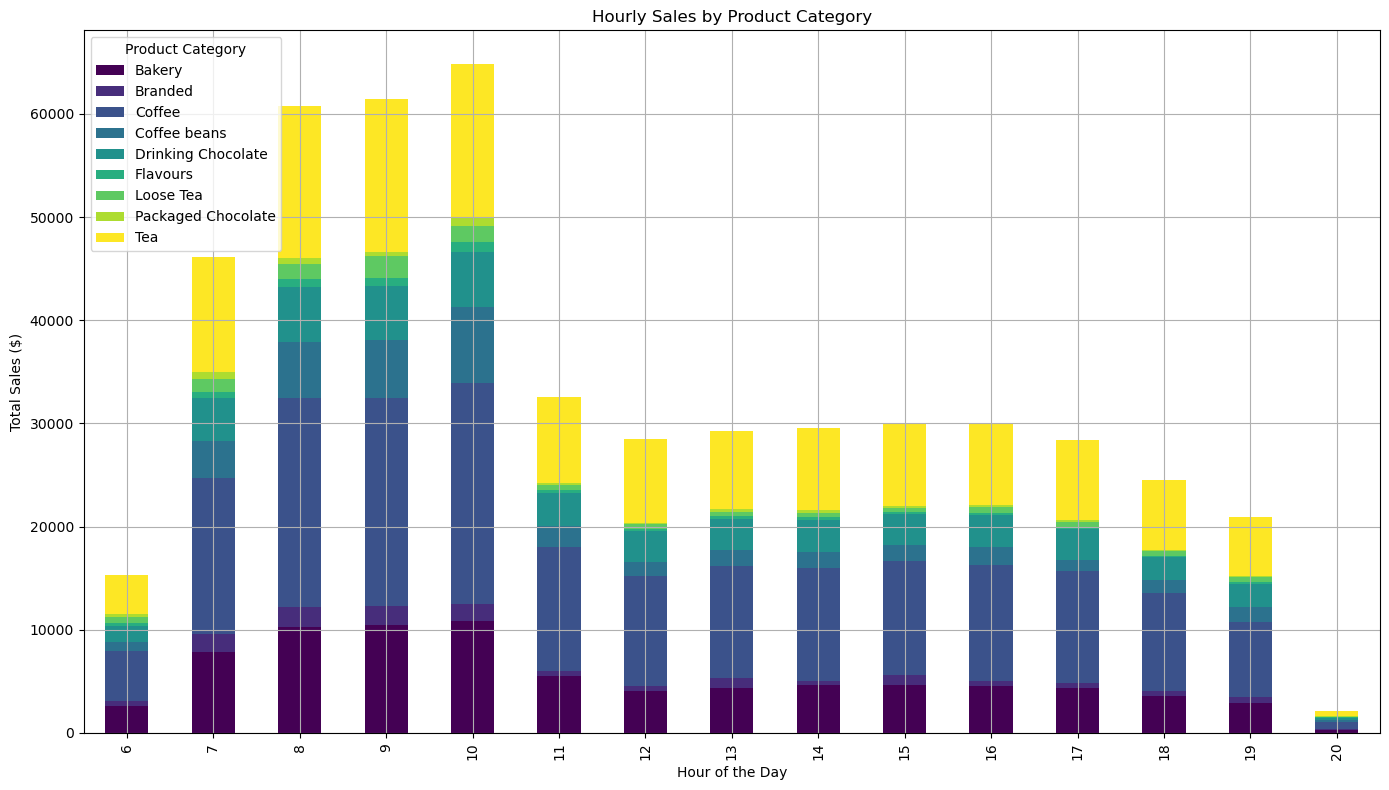

In [22]:
df['hour'] = df['datetime'].dt.hour

hourly_sales_by_product = df.groupby(['hour', 'product_category'])['sales'].sum().unstack()

hourly_sales_by_product.plot(kind='bar',stacked=True, figsize=(14,8), colormap='viridis')

plt.title('Hourly Sales by Product Category')
plt.xlabel('Hour of the Day') 
plt.ylabel("Total Sales ($)")
plt.legend(title='Product Category', loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

In [23]:
df_category['avg-sales'] = df_category['sales']/ df_category['transaction_id']
df_category

,sales,transaction_id,avg-sales
product_category,,,
Coffee,176629.30,58416,3.023646
Tea,128035.35,45449,2.817121
Bakery,80964.14,22796,3.551682
Drinking Chocolate,47578.75,11468,4.148827
Coffee beans,36845.25,1753,21.018397
Branded,13237.00,747,17.720214
Loose Tea,11213.60,1210,9.267438
Flavours,5432.00,6790,0.800000
Packaged Chocolate,4407.64,487,9.050595


In [24]:
sales_by_product = df.groupby('product_type').agg({
    'sales': 'sum',
    'unit_price': 'mean'
}).sort_values('sales', ascending= False)

sales_by_product

,sales,unit_price
product_type,,
Barista Espresso,59956.25,3.655200
Brewed Chai tea,50466.35,2.936993
Hot chocolate,47578.75,4.148827
Gourmet brewed coffee,45605.60,2.696641
Scone,35957.87,3.534638
Brewed Black tea,31152.00,2.744670
Brewed herbal tea,30864.50,2.744731
Pastry,25477.49,3.685979
Premium brewed coffee,25401.15,3.122452


In [25]:
product_sales_df = df.groupby(['product_category', 'product_type'])['sales'].sum().reset_index()
product_sales_df

,product_category,product_type,sales
0,Bakery,Biscotti,19528.78
1,Bakery,Pastry,25477.49
2,Bakery,Scone,35957.87
3,Branded,Clothing,6163.00
4,Branded,Housewares,7074.00
5,Coffee,Barista Espresso,59956.25
6,Coffee,Drip coffee,21065.00
7,Coffee,Gourmet brewed coffee,45605.60
8,Coffee,Organic brewed coffee,24601.30
9,Coffee,Premium brewed coffee,25401.15


AttributeError: module 'matplotlib.pyplot' has no attribute 'tigh_layout'

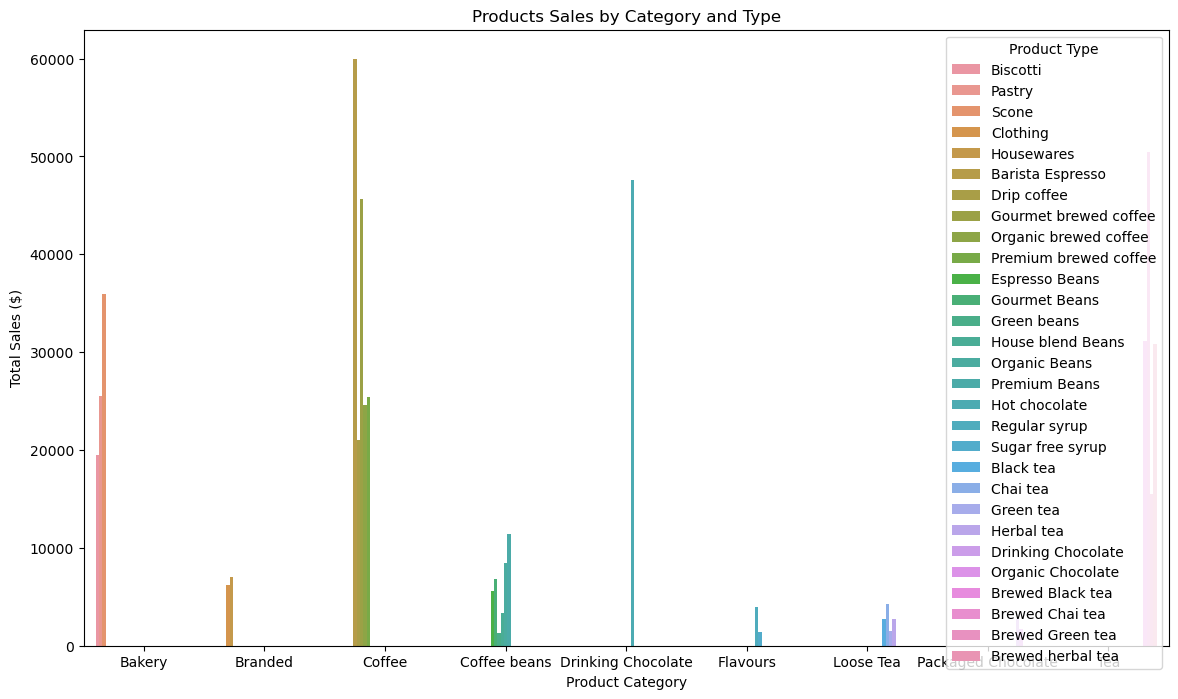

In [26]:
plt.figure(figsize=(14,8))
sns.barplot(data=product_sales_df, x='product_category', y= 'sales', hue='product_type')

#Add labels and title
plt.title('Products Sales by Category and Type')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product Type', loc='upper right')

#Show the Plot
plt.tigh_layout()
plt.show()

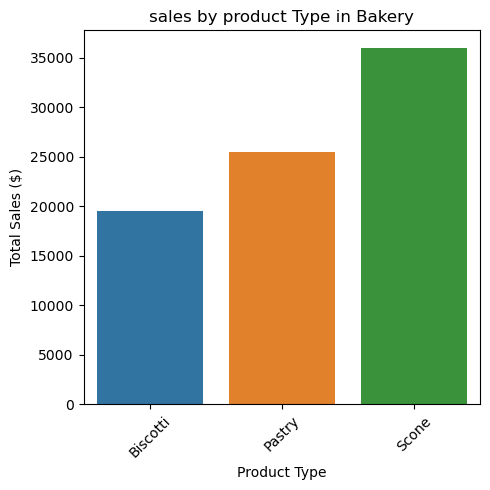

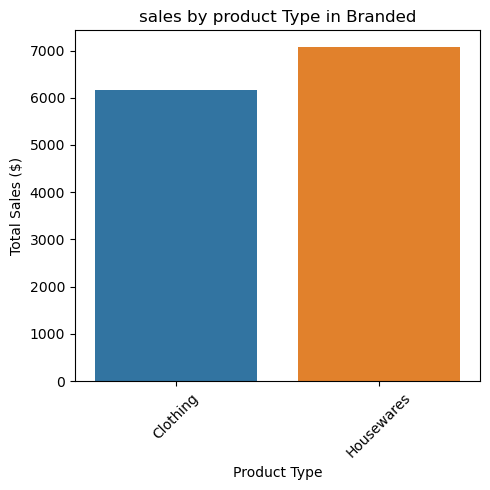

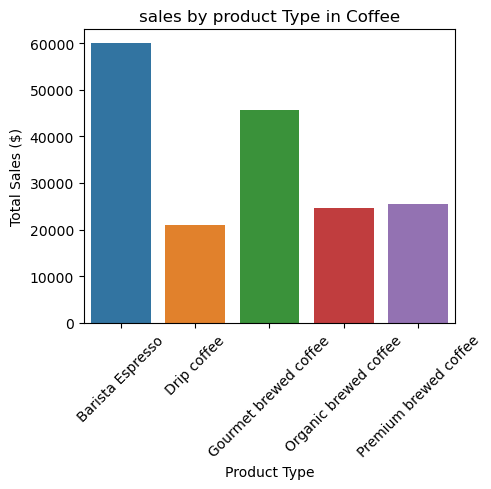

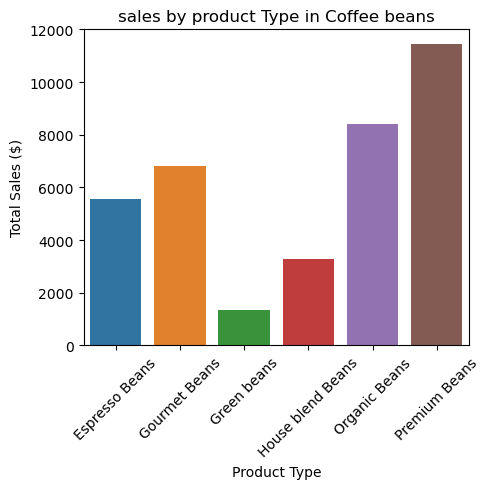

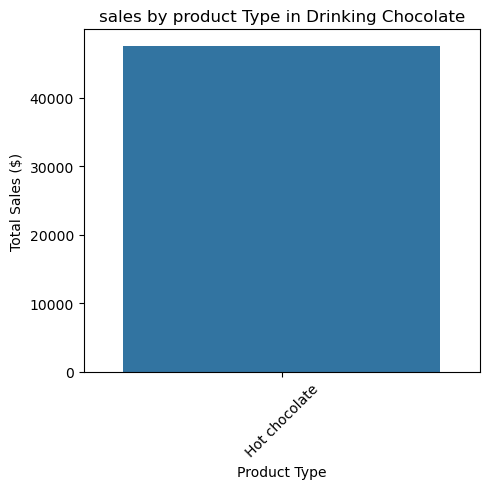

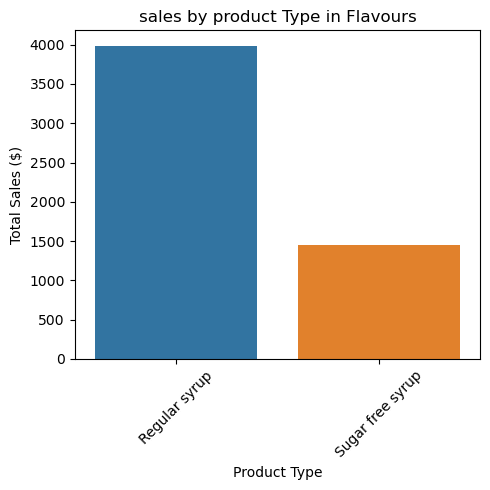

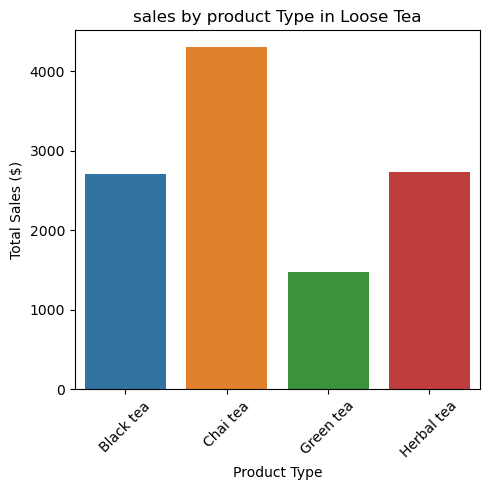

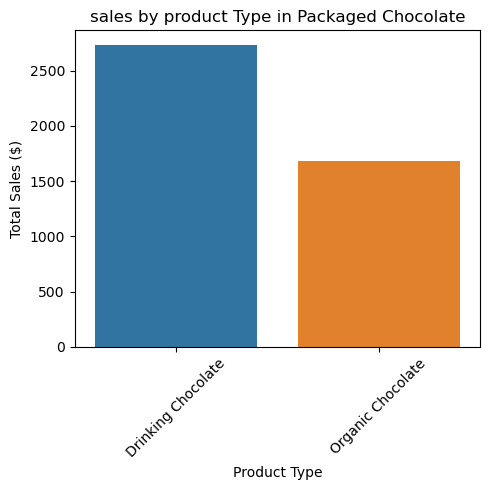

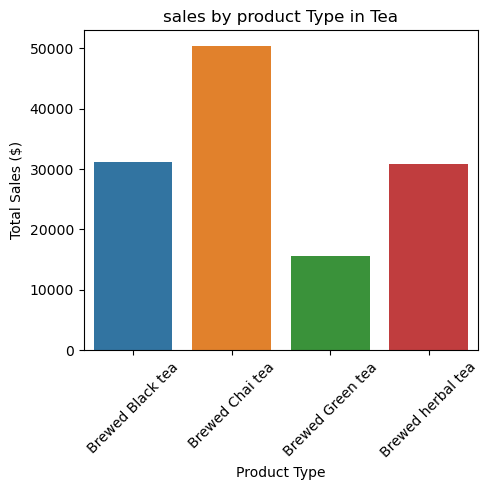

In [27]:
categories = product_sales_df['product_category'].unique()

for category in categories:
    plt.figure(figsize=(5,5))
    category_data = product_sales_df[product_sales_df ['product_category'] == category]
    sns.barplot(data=category_data,x='product_type',y='sales')
    
    #Add labels and title
    plt.title(f'sales by product Type in {category}')
    plt.xlabel('Product Type')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)
    
    #Show the plot
    plt.tight_layout()
    plt.show()

In [28]:
hourly_sales_by_location = df.groupby(['store_location', 'hour'])['sales'].sum().reset_index()

hourly_sales_by_location

,store_location,hour,sales
0,Astoria,7,14143.75
1,Astoria,8,17534.05
2,Astoria,9,17531.52
3,Astoria,10,18313.12
4,Astoria,11,10987.13
5,Astoria,12,11095.20
6,Astoria,13,11544.37
7,Astoria,14,11067.87
8,Astoria,15,11592.45
9,Astoria,16,11908.60


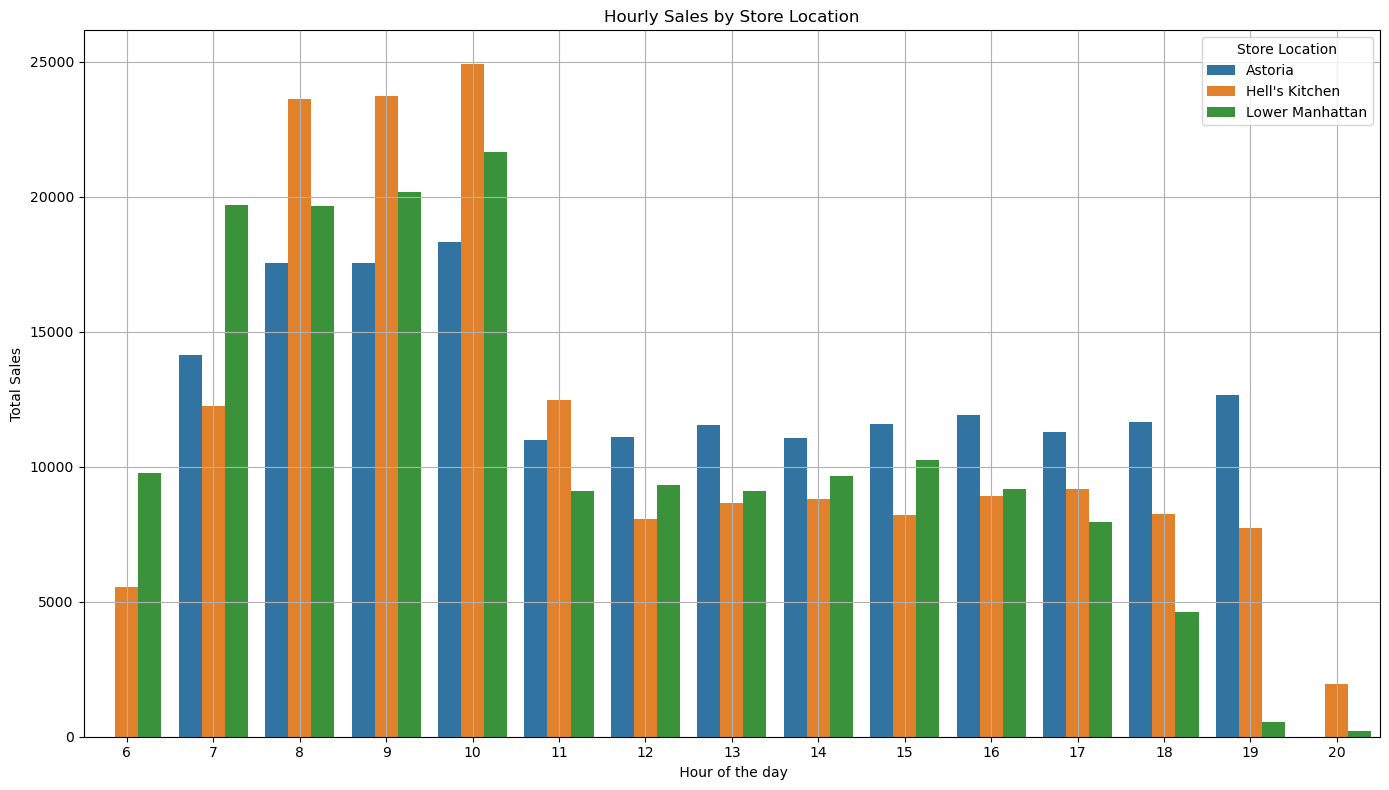

In [29]:
plt.figure(figsize=(14,8))
sns.barplot(data=hourly_sales_by_location,x='hour',y='sales', hue= 'store_location')

plt.title('Hourly Sales by Store Location')
plt.xlabel(' Hour of the day')
plt.ylabel('Total Sales')
plt.legend(title='Store Location', loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()